## logestic regression 
   age vs insurance data 

CSV file created: insurance_data.csv
   Age  Insurance
0   62          1
1   65          1
2   18          0
3   21          0
4   21          0


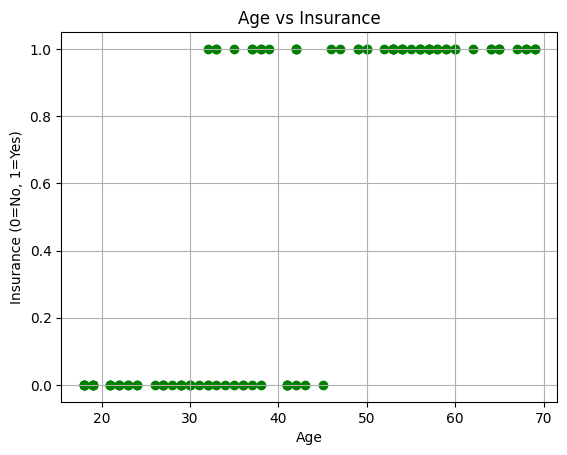

Model Accuracy: 0.85

Predictions for new ages:
Age 22: Prediction = 0 (Insurance Probability = 0.01)
Age 35: Prediction = 0 (Insurance Probability = 0.25)
Age 45: Prediction = 1 (Insurance Probability = 0.81)
Age 60: Prediction = 1 (Insurance Probability = 0.99)


In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Create data
np.random.seed(0)

ages = np.random.randint(18, 70, size=100)
insurance = [1 if age > np.random.randint(30, 50) else 0 for age in ages]

df = pd.DataFrame({
    'Age': ages,
    'Insurance': insurance
})

# Step 3: Save to CSV
df.to_csv("insurance_data.csv", index=False)
print("CSV file created: insurance_data.csv")

# Step 4: Load the data from CSV
data = pd.read_csv("insurance_data.csv")
print(data.head())

# Step 5: Scatter plot
plt.scatter(data['Age'], data['Insurance'], color='green')
plt.xlabel("Age")
plt.ylabel("Insurance (0=No, 1=Yes)")
plt.title("Age vs Insurance")
plt.grid(True)
plt.show()

# Step 6: Prepare data for model
X = data[['Age']]  # Input
y = data['Insurance']  # Output

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 8: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 9: Predict and check accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Step 10: Predict for new ages
new_ages = pd.DataFrame({'Age': [22, 35, 45, 60]})
predictions = model.predict(new_ages)
probabilities = model.predict_proba(new_ages)

print("\nPredictions for new ages:")
for age, pred, prob in zip(new_ages['Age'], predictions, probabilities):
    print(f"Age {age}: Prediction = {pred} (Insurance Probability = {prob[1]:.2f})")
